Noise addition

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.misc import imread

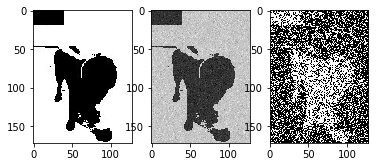

In [2]:
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] += e[index]
    
    return im2

def add_saltnpepper_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    
    return im2

#Proportion of pixels altered
prop = 0.7
varSigma = 0.1

im = imread('GrayBusterr.jpg')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')

imGauss = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(imGauss,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(imSalt,cmap='gray')

plt.show()

21993
0


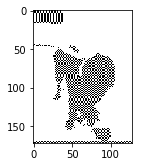

In [3]:
#Acces neighbours code
def neighbours(i,j,M,N,size = 4):
    if size == 4:
        if (i==0 and j==0):
            n=[(0,1),(1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2),(1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1),(M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2),(M-2,N-1)]
        elif i==0:
            n=[(0,j-1),(o,j+1),(1,j)]
        elif i==M-1:
            n=[(M-1,j-1),(M-1,j+1),(M-2,j)]
        elif j==0:
            n=[(i-1,0),(i+1,0),(i,1)]
        elif j==N-1:
            n=[(i-1,N-1),(i+1,N-1),(i,N-2)]
        else:
            n=[(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
            
        return n
    if size==8:
        if (i==0 and j==0):
            n=[(0,1),(1,0),(1,1)]
        elif i==0 and j==N-1:
            n=[(0,N-2),(1,N-1),(1,N-2)]
        elif i==M-1 and j==0:
            n=[(M-1,1),(M-2,0),(M-2,1)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2),(M-2,N-1),(M-2,N-2)]
        elif i==0:
            n=[(0,j-1),(0,j+1),(1,j),(1,j-1),(1,j+1)]
        elif i==M-1:
            n=[(M-1,j-1),(M-1,j+1),(M-2,j),(M-2,j-1),(M-2,j+1)]
        elif j==0:
            n=[(i-1,0),(i+1,0),(i,1),(i-1,1),(i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1),(i+1,N-1),(i,N-2),(i-1,N-2),(i+1,N-2)]
        else:            
            n=[(i-1,j-1),(i,j-1),(i+1,j-1),(i-1,j),(i+1,j),(i+1,j+1),(i,j+1),(i+1,j+1)]
        return n
    
def ICM(img):
    #for each pixel in the image, evaluate E = hxi - beta xixj(neighbours) - nu xiyi(theoretical*real)
    #take lowest
    imShape = img.shape
    h = 0
    beta = 1
    nu = 2.1
    #for index, pixel in np.ndenumerate(img):
     #   i,j = index
      #  if(img[i,j] == 1):
      #      pass
      #  else:
      #      img[i,j] = -1;
    out = np.copy(img)
    for p in range(0,40):
        change = 0
        for index, pixel in np.ndenumerate(img):
            i,j = index
            ne = neighbours(i,j,imShape[0],imShape[1],8)
            xj = -1
            xj2 = 1
            neighVal = 0
            neighVal2 = 0
            #print(img[i,j])
            for (m,n) in ne:
                neighVal += xj*out[m,n]
                neighVal2 += xj2*out[m,n]
            Val = h*xj - beta*(neighVal) - nu*xj*img[i,j]
            Val2 = h*xj2 - beta*(neighVal2) - nu*xj2*img[i,j]
            #print(Val)
            #print(Val2)
            if(Val2 == Val):
                pass
            elif(Val2 > Val):
                out[i,j] = xj2
                if(img[i,j] != out[i,j]):
                    change += 1
            else:
                out[i,j] = xj
                if(img[i,j] != out[i,j]):
                    change += 1
            #print(out[i,j])
                
        print(change)
        if(change==0):
            break
        img = out
        
    for index, pixel in np.ndenumerate(out):
        i,j = index
        if(out[i,j] == 1):
            out[i,j] = 255
        else:
            out[i,j] = 0;
    fig = plt.figure()
    ax = fig.add_subplot(131)
    ax.imshow(out,cmap='gray')
    return out
            
            
prop = 0.7
varSigma = 0.1

im = imread('GrayBusterr.jpg')
im = im/255
#fig = plt.figure()
#ax = fig.add_subplot(131)
#ax.imshow(im,cmap='gray')

imGauss = add_gaussian_noise(im,prop,varSigma)
#ax2 = fig.add_subplot(132)
#ax2.imshow(imGauss,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
#ax3 = fig.add_subplot(133)
#ax3.imshow(imSalt,cmap='gray')

#fig2 = plt.figure()
out = ICM(imGauss)

#ax4 = fig2.add_subplot(131)
#ax4.imshow(out,cmap='gray')
#print("passed")
#print(imSalt[20,30])
plt.show()
            